In [ ]:
#Scikit learn 의 toy data(wisconsin의 유방암 데이터) 활용 - 실습 
#강의자료 p.22-23 data 설명

# 예측모델 성능 평가

In [ ]:
from sklearn import datasets

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Decision Tree 시각화
from sklearn import tree
from IPython.display import Image

# tree를 image로 변환하는 모듈
import pydotplus

In [ ]:
#성능평가 관련 모듈 불러오기
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error

In [ ]:
#malignant(악성, 0), benign(양성, 1)
datasets.load_breast_cancer()

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

## 데이터 셋 구성을 통한 검증


In [ ]:
cancer = datasets.load_breast_cancer() 
X = cancer.data #속성 데이터를 변수 X에 저장
y = cancer.target #클래스 데이터를 변수 y에 저장

Dataset 분할 없이 Decision tree 진행

In [ ]:
clf = DecisionTreeClassifier() #decision tree 생성 및 적합
clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_dot_data = tree.export_graphviz(
    clf,
    feature_names = cancer.feature_names,
    class_names = cancer.target_names
)

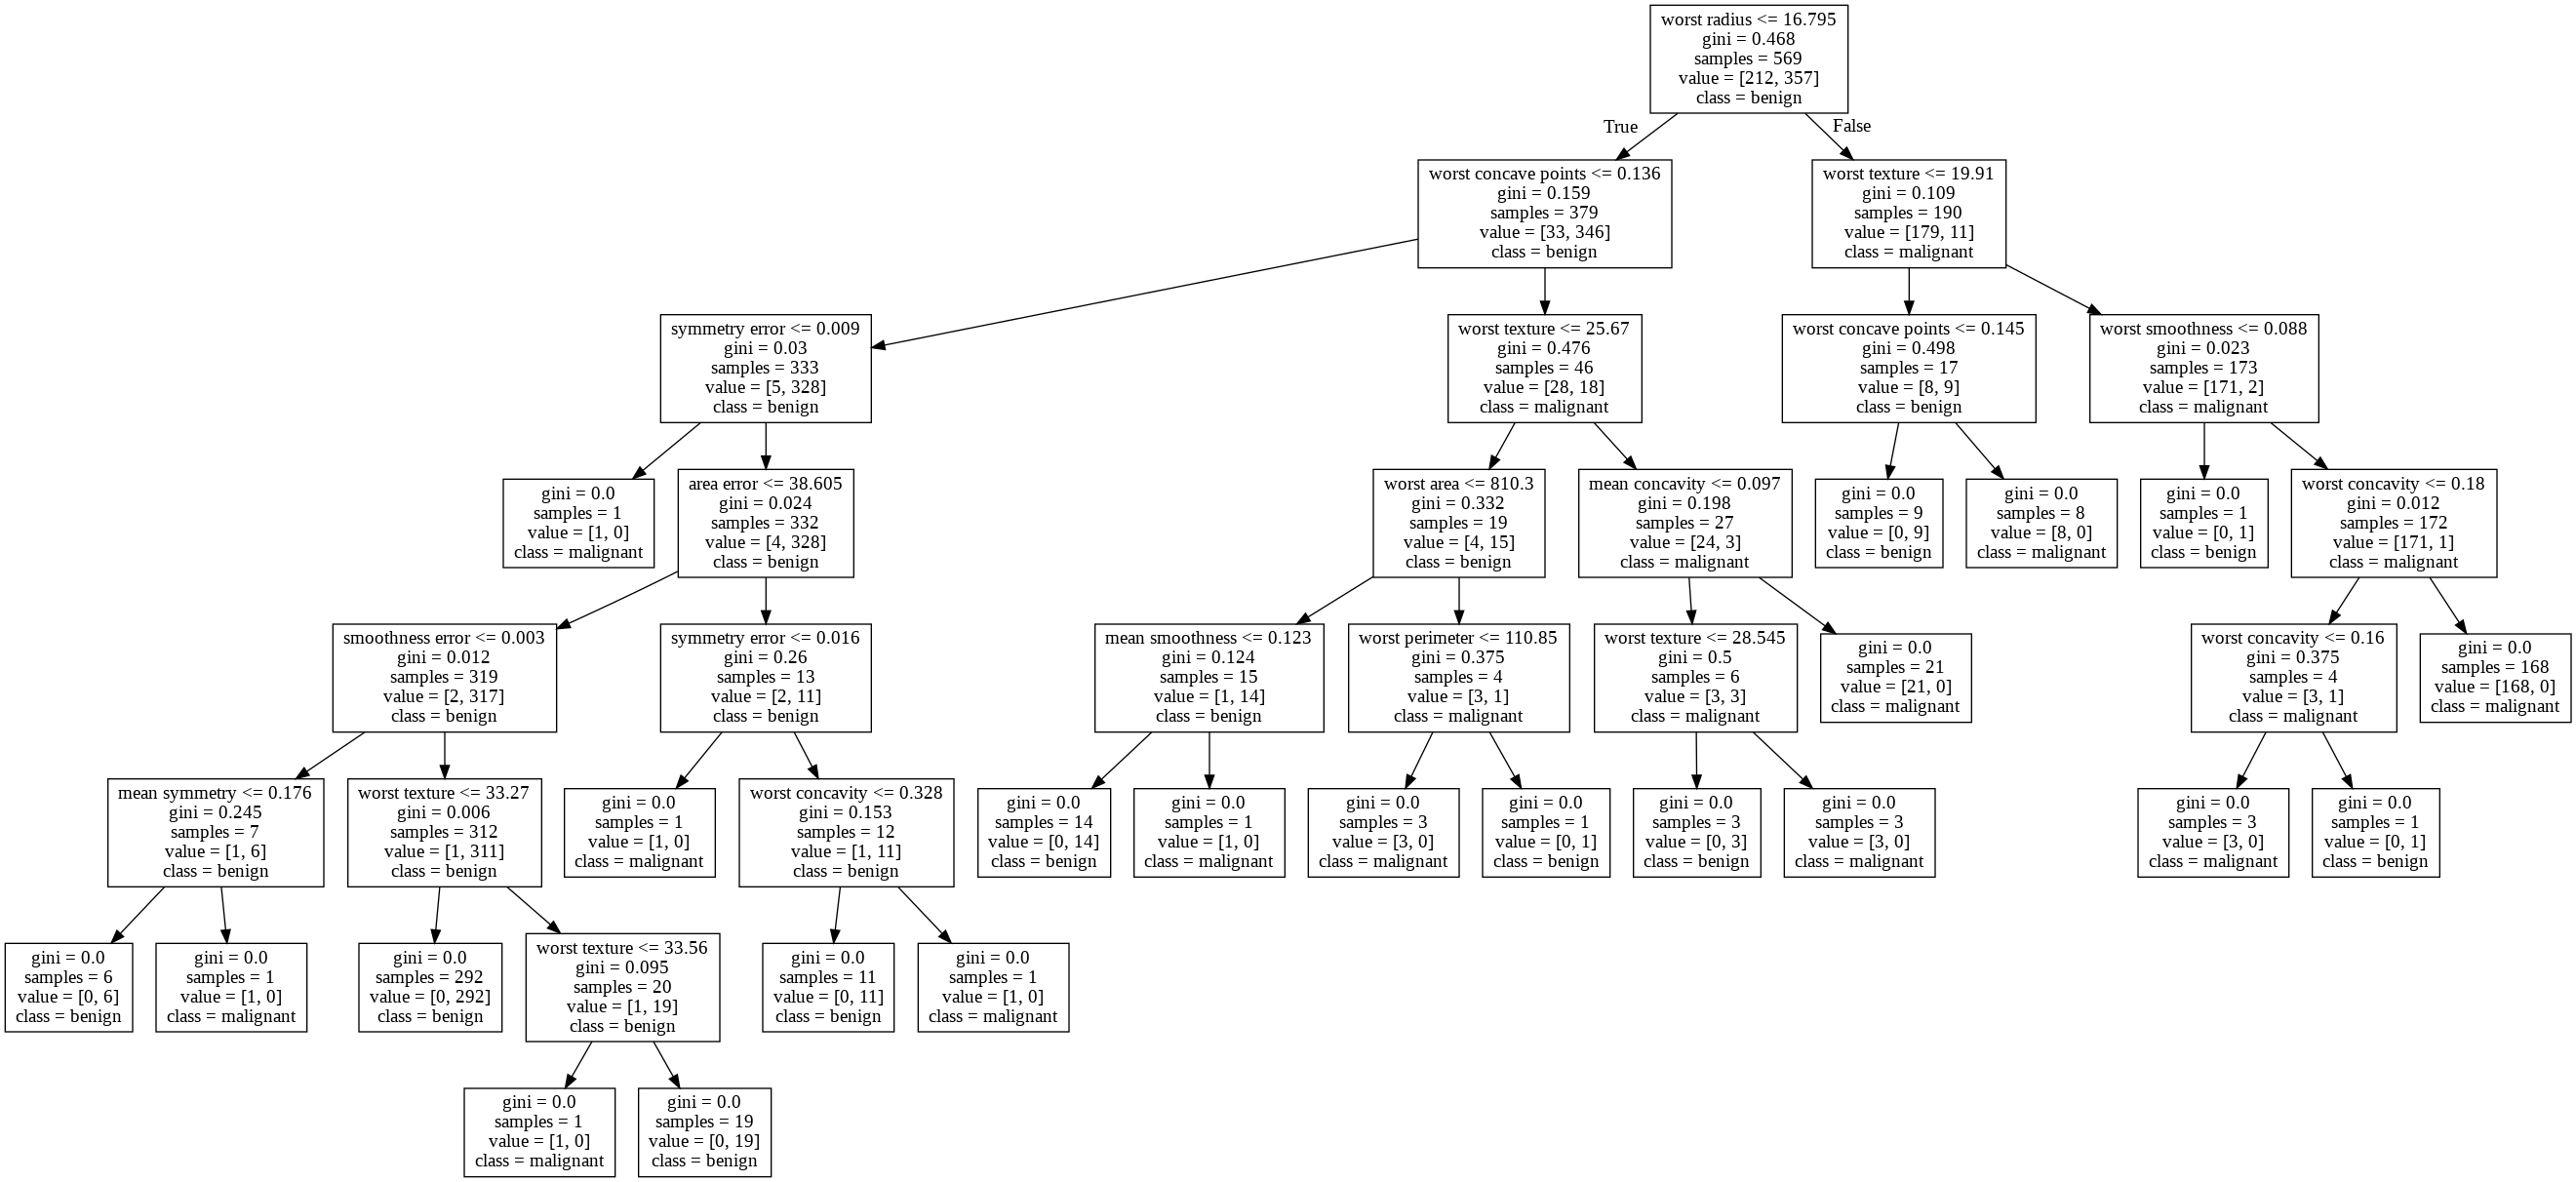

In [ ]:
#dot_data 를 graph로 변환 & png 형성
#pydotplus.graph_from_dot_data(dt_dot_data).create_png()
Image(pydotplus.graph_from_dot_data(dt_dot_data).create_png()) #Image() 안에 들어가야 그림이 나옴

In [ ]:
y_pred = clf.predict(X) #예측 y

### 홀드아웃 검증
> 데이터 셋을 train / test set 으로 나눔


*   train set 이 작으면 모델 정확도의 분산 증가
*   train set 이 커지면 test set으로 부터 측정한 정확도의 신뢰도 하락





Data set 분할

In [ ]:
#data set 분할 관련 모듈
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #data set 분할

기계학습 모델 성능평가

In [ ]:
clf = DecisionTreeClassifier() #decision tree 생성 및 적합
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

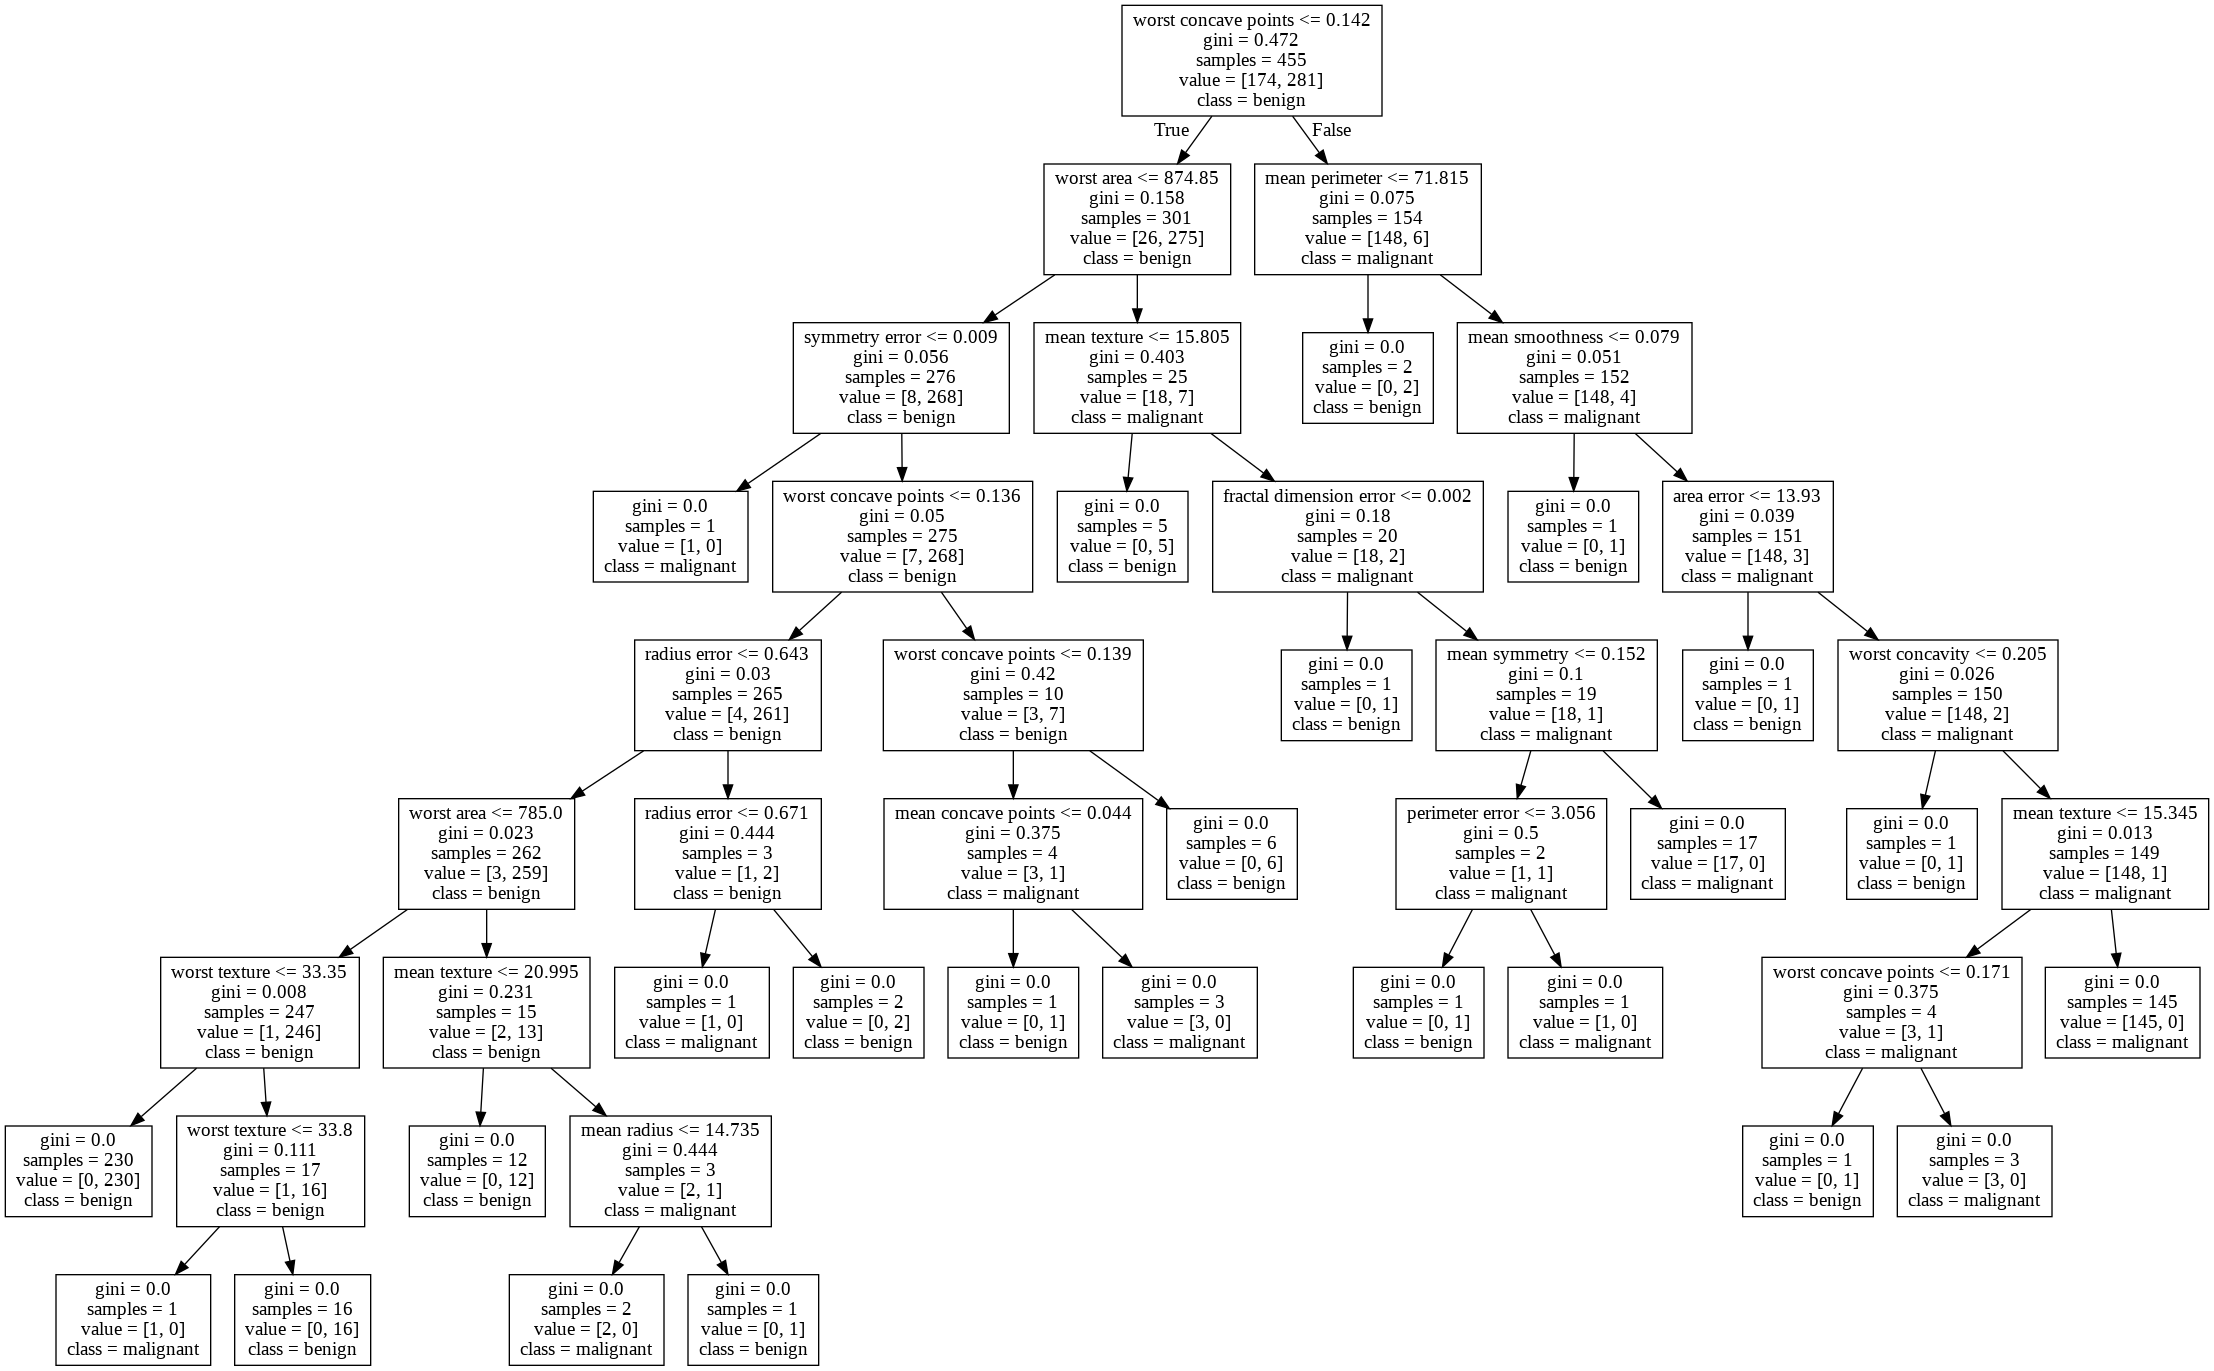

In [ ]:
dt_dot_data = tree.export_graphviz(
    clf,
    feature_names = cancer.feature_names,
    class_names = cancer.target_names
)

Image(pydotplus.graph_from_dot_data(dt_dot_data).create_png())

In [ ]:
y_pred = clf.predict(X_test) 

In [ ]:
y_pred #예측 y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1])

In [ ]:
y_test #실제 y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0])

Confusion Matrix를 통한 검증

In [27]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[34  4]
 [ 5 71]]


In [29]:
#정확도, normalize = False: 올바르게 분류된 데이터 건수 출력
print("Accuracy")
accuracy_score(y_test, y_pred, normalize = False) 

Accuracy


105

In [28]:
#정확도, normalize = True: 올바르게 분류된 데이터 비율 출력
print("Accuracy")
accuracy_score(y_test, y_pred, normalize = True) 

Accuracy


0.9210526315789473

Classification_report

In [30]:
print("Classification Report")
print(classification_report(y_test, y_pred)) 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.93      0.94        76

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



MSE (평균제곱오차)



```
# MSE 직접 계산하기

import numpy as np
np.sum((y_test - y_pred)*(y_test - y_pred))/len(y_test)

```



In [31]:
print("Mean Squared Error")
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.07894736842105263


### K fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

데이터 셋 구성

In [34]:
# k = 10인 Cross Validation
# shuffle = True: 데이터를 섞은 후 데이터 셋 구성 - 인덱스가 섞임
skf = StratifiedKFold(n_splits = 10, shuffle = True)  
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [35]:
#데이터 셋 구성 확인
for train_index, test_index in skf.split(X, y):
  print("Train set: ", train_index)
  print("Test set: ", test_index)

Train set:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  18  19
  20  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  59  60  61  62  63  64  65  66  67  69  70  71  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 107 108 110 111 112 113 114 115 117
 118 119 120 121 122 123 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 177 178 179 180 181 182 183 184 185 187 188 189 190 191 192 193 194 195
 197 198 199 200 201 202 204 205 206 207 209 210 212 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 231 232 233 234 235 236 237 239
 240 241 242 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 27

기계학습 모델 성능평가

In [37]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = skf)

print("K Fold Cross Validation Score")
print(scores)
print()

print("Average Accuracy")
print(scores.mean()) #10개의 Accuracy의 평균 출력

K Fold Cross Validation Score
[0.89473684 0.94736842 0.92982456 0.92982456 0.87719298 0.9122807
 0.94736842 0.94736842 0.92982456 0.92857143]

Average Accuracy
0.924436090225564
